In [98]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [99]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [100]:
y = df['price']
X = df.drop(columns='price')

## 1.2 Split the data into test and train datasets using train_test_split

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.7, random_state=42)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [102]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [103]:
print(f'Model Intercept: {model.intercept_:20}')
for feat, coef in zip(X.columns, model.coef_):
    print('\n' f'coefficient of {feat:12} -->   {coef:.10}')

Model Intercept:  -2287537.5778792086

coefficient of make         -->   -32.96497678

coefficient of body         -->   -1757.945656

coefficient of mileage      -->   -36.35238599

coefficient of engV         -->   248.5348476

coefficient of engType      -->   -1206.230315

coefficient of registration -->   4333.935062

coefficient of year         -->   1149.692387

coefficient of drive        -->   8237.649473


## 1.5 Use the test data to make predictions

In [104]:
y_pred = model.predict(X_test)
y_pred

array([18911.30033626,  5448.12668562, 25749.13248478, ...,
       34418.7035715 ,  8614.49262701,  -700.3892326 ])

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [105]:
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print(f'RMSE : {RMSE}')
print(f'R^2 : {R2}')

RMSE : 21124.120756898203
R^2 : 0.28125020200142503


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

The coefficient of year (1149.6923871761712) as found above tells us that there is a positive correlation between year and price, i.e. each year increase (the newer the vehicle) adds about 1150 in price.

## 1.8 How should we interpret the Root-Mean-Square Error?

A RMSE of 21,124 isn't a great result as of now.  The RMSE is an unit adjusted MSE so it's telling us that on average, a data point in our data set will be 21,124 away from the line of best fit (measured vertically).

## 1.9 How should we interpret the $R^2$?

$R^2$ is also known as the coefficient of determination and it tells us how well our line of best fit matches our data.  In this case, a little less than 30% of y is accounted for (or determined) by the independent variables used.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

/Users/lambda_school_loaner_32/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


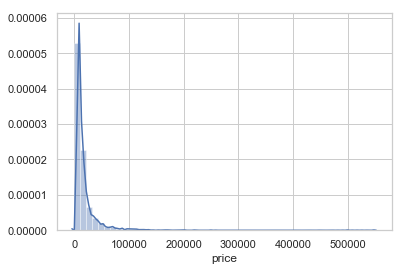

In [106]:
# Price has a heavy skew.
sns.distplot(df['price']);

In [107]:
df['ln_price'] = np.log(df['price'])

/Users/lambda_school_loaner_32/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


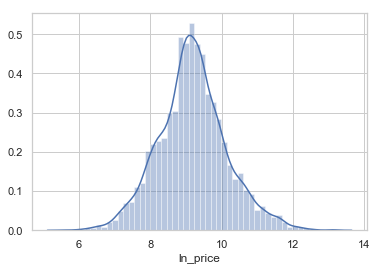

In [108]:
# Heavy skew is corrected by taking the natural log of our target.
sns.distplot(df['ln_price']);

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

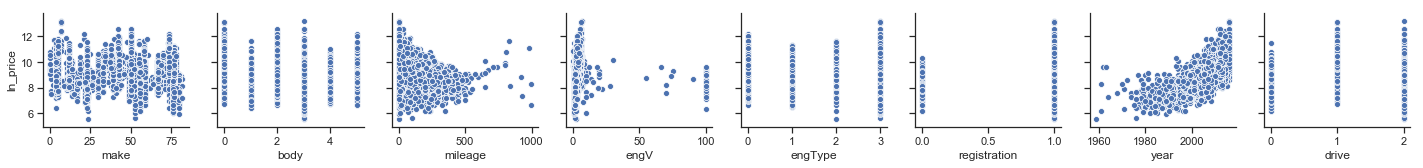

In [109]:
y = df['ln_price']
X = df.drop(columns=['price','ln_price'])

# A pairplot so we can visually inspect the relationship between our desired outcome and our independant variables.
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=X.columns)
plt.show()

Year could definitely be bettered by creating a polynomial feature.  Mileage may as well, though the plot is less clear.  We'll try anyways.

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)]


/Users/lambda_school_loaner_32/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/Users/lambda_school_loaner_32/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/Users/lambda_school_loaner_32/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


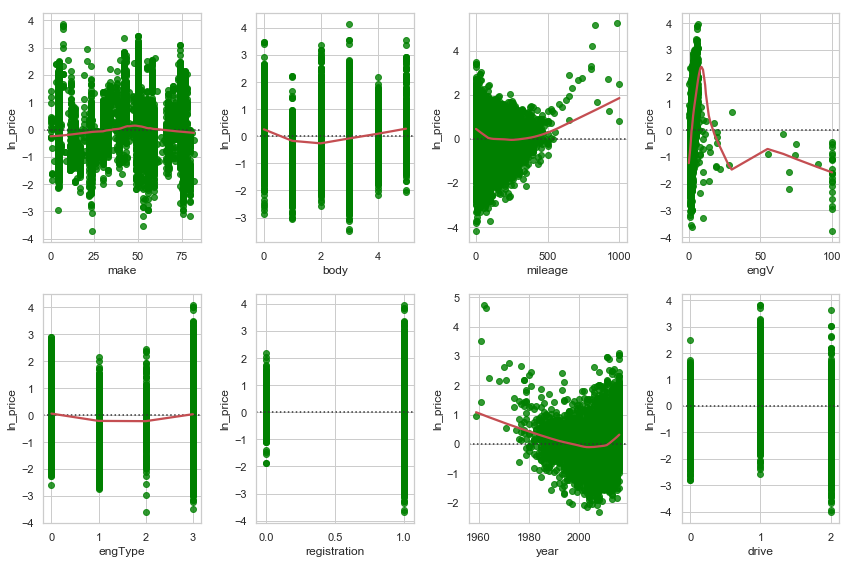

In [110]:
#Residual Plots might give us some more information about other non-linearly distributed features
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(12,8));
X = df.drop('price',axis=1)
y = df.ln_price

# a way to keep 
position_list = []
for i in range(2):
    for j in range(4):
        position_list.append((i,j))

print(position_list)
        
for col, pos in zip(X.columns, position_list):
    sns.residplot(X[col], y, lowess=True, color="r", ax=axs[pos[0]][pos[1]],
                  scatter_kws={'color':'green'})
plt.tight_layout()

## 2.3 If appropriate, create any polynomial features. 

In [111]:
# Only mileage and year looks like appropriate candidates.  At first glance engV looks like a possibility but it seems irregular.
df['mileage_sq'] = df['mileage']**2
df['year_sq'] = df['year']**2

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [112]:
y = df['ln_price']
# removing targets and redundant/ less precise features
X = df.drop(columns=['price', 'ln_price', 'mileage', 'year'])

In [113]:
# Splitting out test and train data.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.7, random_state=42)

In [114]:
# Training the model.
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
# 
print('Intercept: ', model.intercept_)
for feat, coef in zip(X.columns, model.coef_):
    print('\n', 'ln_price coefficient of', feat, ':', coef)

Intercept:  -88.94644355479227

 ln_price coefficient of make : -0.001300496841614999

 ln_price coefficient of body : -0.08706373840181993

 ln_price coefficient of engV : 0.008339314620247302

 ln_price coefficient of engType : -0.053211109072510226

 ln_price coefficient of registration : 0.7036630226965611

 ln_price coefficient of drive : 0.39711524748710575

 ln_price coefficient of mileage_sq : 7.050731360980222e-07

 ln_price coefficient of year_sq : 2.422808250803106e-05


In [116]:
y_pred = model.predict(X_test)
y_pred

array([ 9.42067239,  8.70918613,  9.79045863, ..., 10.15578552,
        8.76908359,  7.54177186])

In [117]:
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print(f'RMSE : {RMSE}')
print(f'R^2 : {R2}')

RMSE : 0.5648009490491617
R^2 : 0.6591303851883625


Much improved RMSE and $R^2$ values.

## 2.5 How might we interpret the coefficient on "year" in this new regression model?

Each incremental increase from **year_sq** corresponds with a **.000024** increase in price. 

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient Descent seeks to find optimum values of a function.  It does this by minimizing cost functions (error functions).  Cost functions describe how well our hypothesis function (a starting point) matches our data. Thus, by minimizing the cost (error) we can hone in on a global minimum (our optimum value).  

## 3.2 What is the "Learning Rate" and what is its function?

![Gradient Descent Equation](https://cdn-images-1.medium.com/max/800/0*8yzvd7QZLn5T1XWg.jpg)

A learning rate defines the size of the steps we take in some iterative process.  The right side of the equation above calculates the slope and replaces the $\theta_j$ value on the left.  This process usually continues for a certain amount of iterations (otherwise is can run indefinitely).

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [118]:
# Use Statsmodels to run an OLS regression
# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 25 Jan 2019   Prob (F-statistic):               0.00
Time:                        11:42:09   Log-Likelihood:                -7158.5
No. Observations:                8495   AIC:                         1.434e+04
Df Residuals:                    8486   BIC:                         1.440e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -88.4908      1.575    -56.193   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [119]:
#VIF
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

for column, vif in zip(X.columns, vifs):
    print(f'{column:20} {vif:<7.2f}')

const                27250.91
make                 1.06   
body                 1.13   
engV                 1.01   
engType              1.11   
registration         1.08   
drive                1.13   
mileage_sq           1.25   
year_sq              1.28   


It looks like we don't have much of an issue with collinearity! 